In [1]:
from tensorflow.keras.datasets import imdb

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

The argument *num_words=10000* means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

Because you’re restricting yourself to the top 10,000 most frequent words, no word index will exceed 10,000:

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
# Let's quickly decode a review

# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words
'''Decodes the review. Note that the indices are offset by 3 
        because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”'''
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data: 
You can’t feed lists of integers into a neural network. You have to turn your lists into tensors. There are two ways to do that:
- Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer, which we’ll cover in detail later in the book). 
- One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

In [7]:
#Encoding the integer sequences into a binary matrix
'''Explaination: I first created 2D matrix of shape(number of examples,10000)
        then I looped over each word of each example, if it exist put 1 in its place
        if not just leave it as 0
        ITS JUST ONE HOT ENCODER'''
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [8]:
X_train.shape

(25000, 10000)

In [9]:
#vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the model

In [11]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

## Validating your approach
In order to monitor during training the accuracy of the model on data it has never seen before, you’ll create a validation set by setting apart 10,000 samples from the original training data.

In [12]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_X_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5211 - binary_accuracy: 0.7797 - val_loss: 0.3947 - val_binary_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3199 - binary_accuracy: 0.8953 - val_loss: 0.3118 - val_binary_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2393 - binary_accuracy: 0.9206 - val_loss: 0.2886 - val_binary_accuracy: 0.8850
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1937 - binary_accuracy: 0.9375 - val_loss: 0.2768 - val_binary_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1627 - binary_accuracy: 0.9471 - val_loss: 0.2933 - val_binary_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1402 - binary_accuracy: 0.9555 - val_loss: 0.2889 - val_binary_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - los

Note that the call to *model.fit()* returns a *History* object. This object has a member *history*, which is a dictionary containing data about everything that happened during training. Let’s look at it:

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

## Plotting the training and validation loss

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

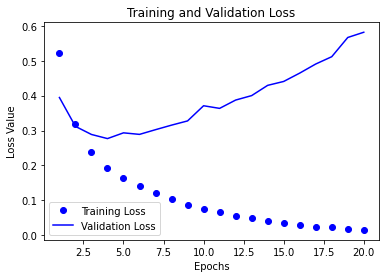

In [16]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

## Plotting the training and validation accuracy

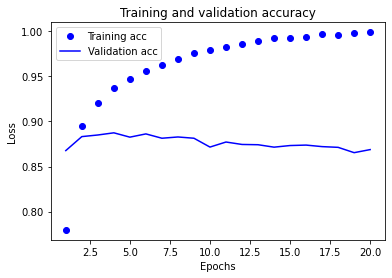

In [17]:
plt.clf() #Clears the figure 
acc_values = history_dict['binary_accuracy'] 
val_acc_values = history_dict['val_binary_accuracy'] 
plt.plot(epochs, acc_values, 'bo', label='Training acc') 
plt.plot(epochs, val_acc_values, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show()

## Retraining a model from scratch

In [18]:
model = models.Sequential() 
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=4, batch_size=512) 


Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.4512 - accuracy: 0.8225
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2722 - accuracy: 0.9043
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2144 - accuracy: 0.9230
Epoch 4/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1815 - accuracy: 0.9345


In [19]:
results = model.evaluate(X_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.2921 - accuracy: 0.8833


## Using a trained network to generate predictions on new data

In [20]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)

782/782 [==============================] - 1s 1ms/step


In [21]:
result

array([[0.18888023],
       [0.9994846 ],
       [0.6730389 ],
       ...,
       [0.0899378 ],
       [0.05686651],
       [0.5063579 ]], dtype=float32)

In [22]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = np.asarray([round(x) for x in score])

In [23]:
y_pred

array([0., 1., 1., ..., 0., 0., 1.])

In [24]:
from tensorflow.keras.metrics import mean_absolute_error
mae = mean_absolute_error = (y_pred, y_test)

In [25]:
# Error
mae

(array([0., 1., 1., ..., 0., 0., 1.]),
 array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))